<a href="https://colab.research.google.com/github/SilverShadow123/Python/blob/master/python_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv

--2026-01-16 06:47:28--  https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.04s   

2026-01-16 06:47:29 (1.47 MB/s) - ‘titanic.csv’ saved [60302/60302]



# **Task 1: Data Loading and Initial Inspection**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset (e.g., using pandas in Python).

In [ ]:
df = pd.read_csv('/content/titanic.csv')

Display the first 5 rows to get a quick look at the data structure.

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check the data types of all columns (.info()).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Get descriptive statistics of the numerical columns (.describe()).

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Identify the total number of missing values for each column.

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Task 2: Handling Missing Values**

Calculate the percentage of missing values in the Cabin column.

In [ ]:
cabin_missing_percentage = (df['Cabin'].isnull().sum()/len(df)) * 100
print(f'The percentage of missing values in the Cabin column : {cabin_missing_percentage:.2f}%')

The percentage of missing values in the Cabin column : 77.10%


Decision: Do we need to drop the Cabin column entirely from the analysis? Briefly justify your reason.

For EDA the cabin column has little to information. We can see that the percentage of missing values in the Cabin column is 77.10%. Also the column does not contains numerical value. So, Thats why we should drop the Cabin column entirely from the analysis.

In [ ]:
df = df.drop(columns=['Cabin'])

Find the most frequent port of embarkation (the mode).

In [ ]:
mode_embarked = df['Embarked'].agg('mode')[0]
mode_embarked

'S'

Impute the missing values in the Embarked column with the mode.

In [ ]:
df['Embarked']=df['Embarked'].fillna(mode_embarked)
df['Embarked'].isnull().sum()

np.int64(0)

Impute the missing values in the Age column with the median age.

In [ ]:
median_age = df['Age'].agg('median')
median_age

28.0

In [ ]:
df['Age'] = df['Age'].fillna(median_age)
df['Age'].isnull().sum()

np.int64(0)

# **Task 3: Univariate Analysis**

Calculate the overall survival rate (percentage of passengers who survived).

In [ ]:
survival_rate = df['Survived'].mean()*100
print(f'Overall Survival Rate : {survival_rate:.2f}%')

Overall Survival Rate : 38.38%


Visualize the distribution of the Survived variable (e.g., a count plot/bar chart).

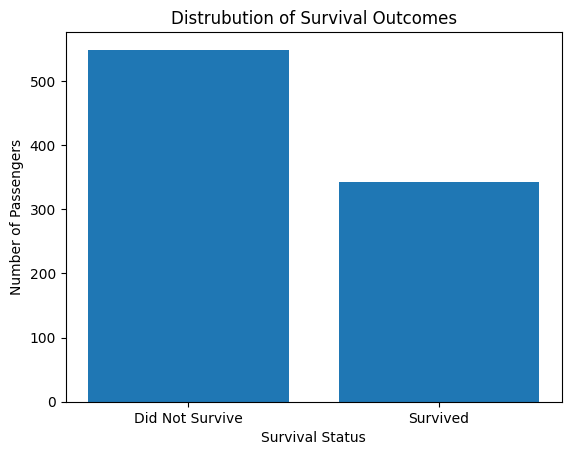

In [ ]:
survival_counts = df['Survived'].value_counts()

plt.bar(survival_counts.index, survival_counts.values)

plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Distrubution of Survival Outcomes')
plt.show()

Visualize the distribution of Pclass using a count plot.

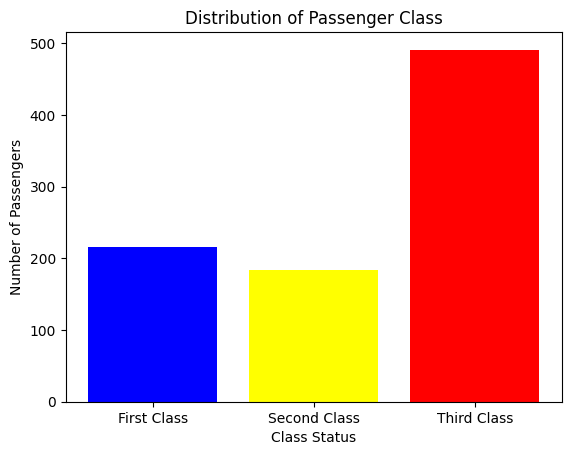

In [ ]:
from matplotlib import colors
passenger_class = df['Pclass'].value_counts()
plt.bar(passenger_class.index, passenger_class.values,color=['red', 'blue', 'yellow'])
plt.xticks([1, 2, 3],['First Class', 'Second Class', 'Third Class'])
plt.title('Distribution of Passenger Class')
plt.xlabel('Class Status')
plt.ylabel('Number of Passengers')
plt.show()

Identify which class had the most passengers.

From the looks of it we can see third class has the most *passenger*

Plot a histogram of the Age column to visualize its distribution.

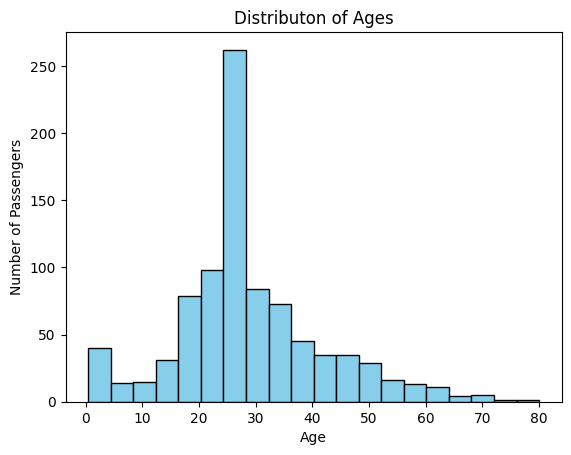

In [ ]:
age = df['Age']
plt.hist(age, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distributon of Ages')
plt.show()

# **Task 4: Bivariate and Multivariate Analysis**

Create a crosstabulation (or a grouped count) to show the count of survivors and non-survivors grouped by Sex.

In [ ]:
crosstabulation = pd.crosstab(df['Sex'], df['Survived'])
crosstabulation

Survived,0,1
Sex,,
female,81,233
male,468,109


Visualize this relationship using a stacked bar chart or a grouped count plot.

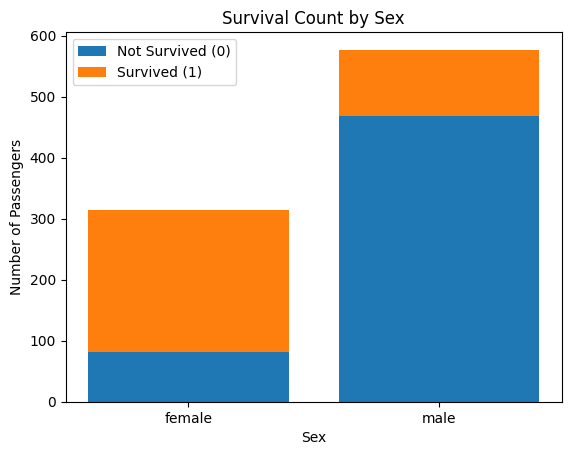

In [ ]:
plt.bar(crosstabulation.index, crosstabulation[0], label='Not Survived (0)')
plt.bar(crosstabulation.index, crosstabulation[1],bottom=crosstabulation[0], label='Survived (1)')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Survival Count by Sex')
plt.legend()
plt.show()

Question: Which gender had a significantly higher survival rate?

From the looks of the chart the female survived more.

Calculate and visualize the survival rate for each Pclass.

In [ ]:
survival_pclass = pd.crosstab(df['Pclass'], df['Survived'])
survival_pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
survival_rate_class = survival_pclass.div(survival_pclass.sum(axis=1), axis=0) * 100
survival_rate_class

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


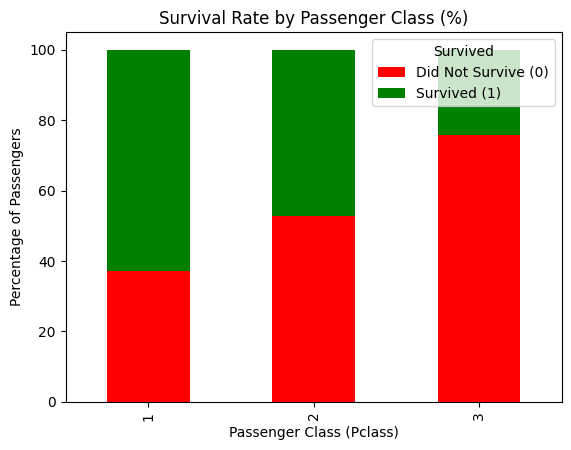

In [ ]:
survival_rate_class.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Percentage of Passengers')
plt.title('Survival Rate by Passenger Class (%)')
plt.legend(title='Survived', labels=['Did Not Survive (0)', 'Survived (1)'])
plt.show()


Yes, there is a clear correlation — the higher the ticket class the higher the chance of survival on the Titanic.

Plot and compare the age distribution of survivors vs. non-survivors.

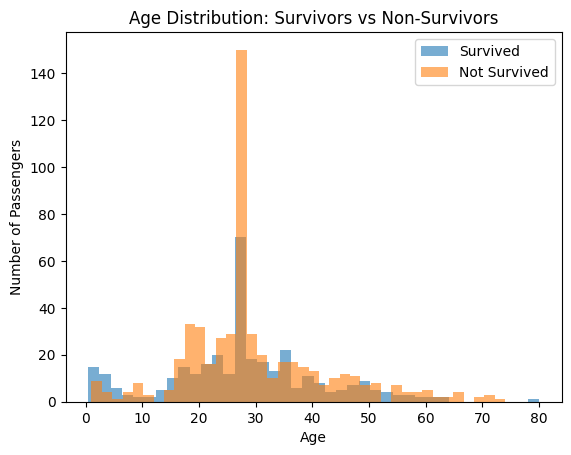

In [ ]:
plt.hist(df[df['Survived'] == 1]['Age'], bins=40, alpha=0.6, label='Survived')
plt.hist(df[df['Survived'] == 0]['Age'], bins=40, alpha=0.6, label='Not Survived')

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.legend()
plt.show()

Observation: What does the plot suggest about the survival chances of children and the elderly?

The plot suggests that children had a higher chance of survival, while elderly passengers had lower survival rates.

Calculate and visualize the survival rate for each Embarked port.

In [ ]:
survived_embarked = pd.crosstab(df['Embarked'], df['Survived'])
survived_embarked

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


In [ ]:
survived_embarked_rate = survived_embarked.div(survived_embarked.sum(axis=1), axis=0) * 100
survived_embarked_rate

Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.099071,33.900929


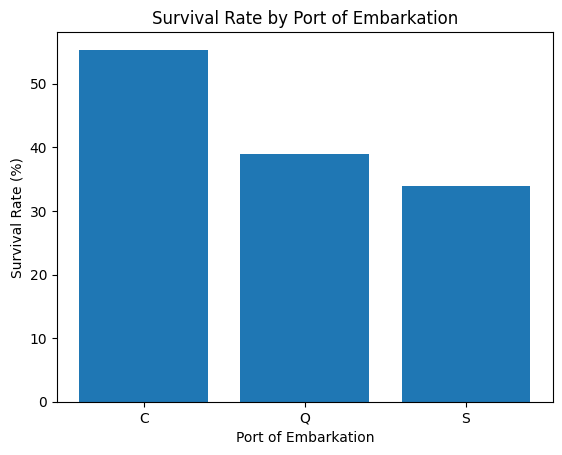

In [ ]:
plt.bar(survived_embarked_rate.index, survived_embarked_rate[1])

plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Port of Embarkation')
plt.show()

# **Task 5: Conclusion and Insights**

Based on the data analysis, survival on the Titanic depended on a few clear factors. Women survived more than men because women and children were helped first. Passenger class was very important—people in first class survived much more than people in second or third class. Age also mattered as children had a better chance to survive than older people. Overall gender, class and age were the main reasons that affected survival.